# Time Series Clustering

Here, we load the silhouette widths for various cluster values, select the most appropriate cluster value per objective, and identify the scenarios with the worst clusters.



## 0. Imports

In [1]:
from optimization.scenariodiscovery.clustering.silhouette_widths import *
from optimization.general.visualization import *
from ema_workbench.analysis import plotting, Density
import os

## 1. Load and plot Silhouette Widths

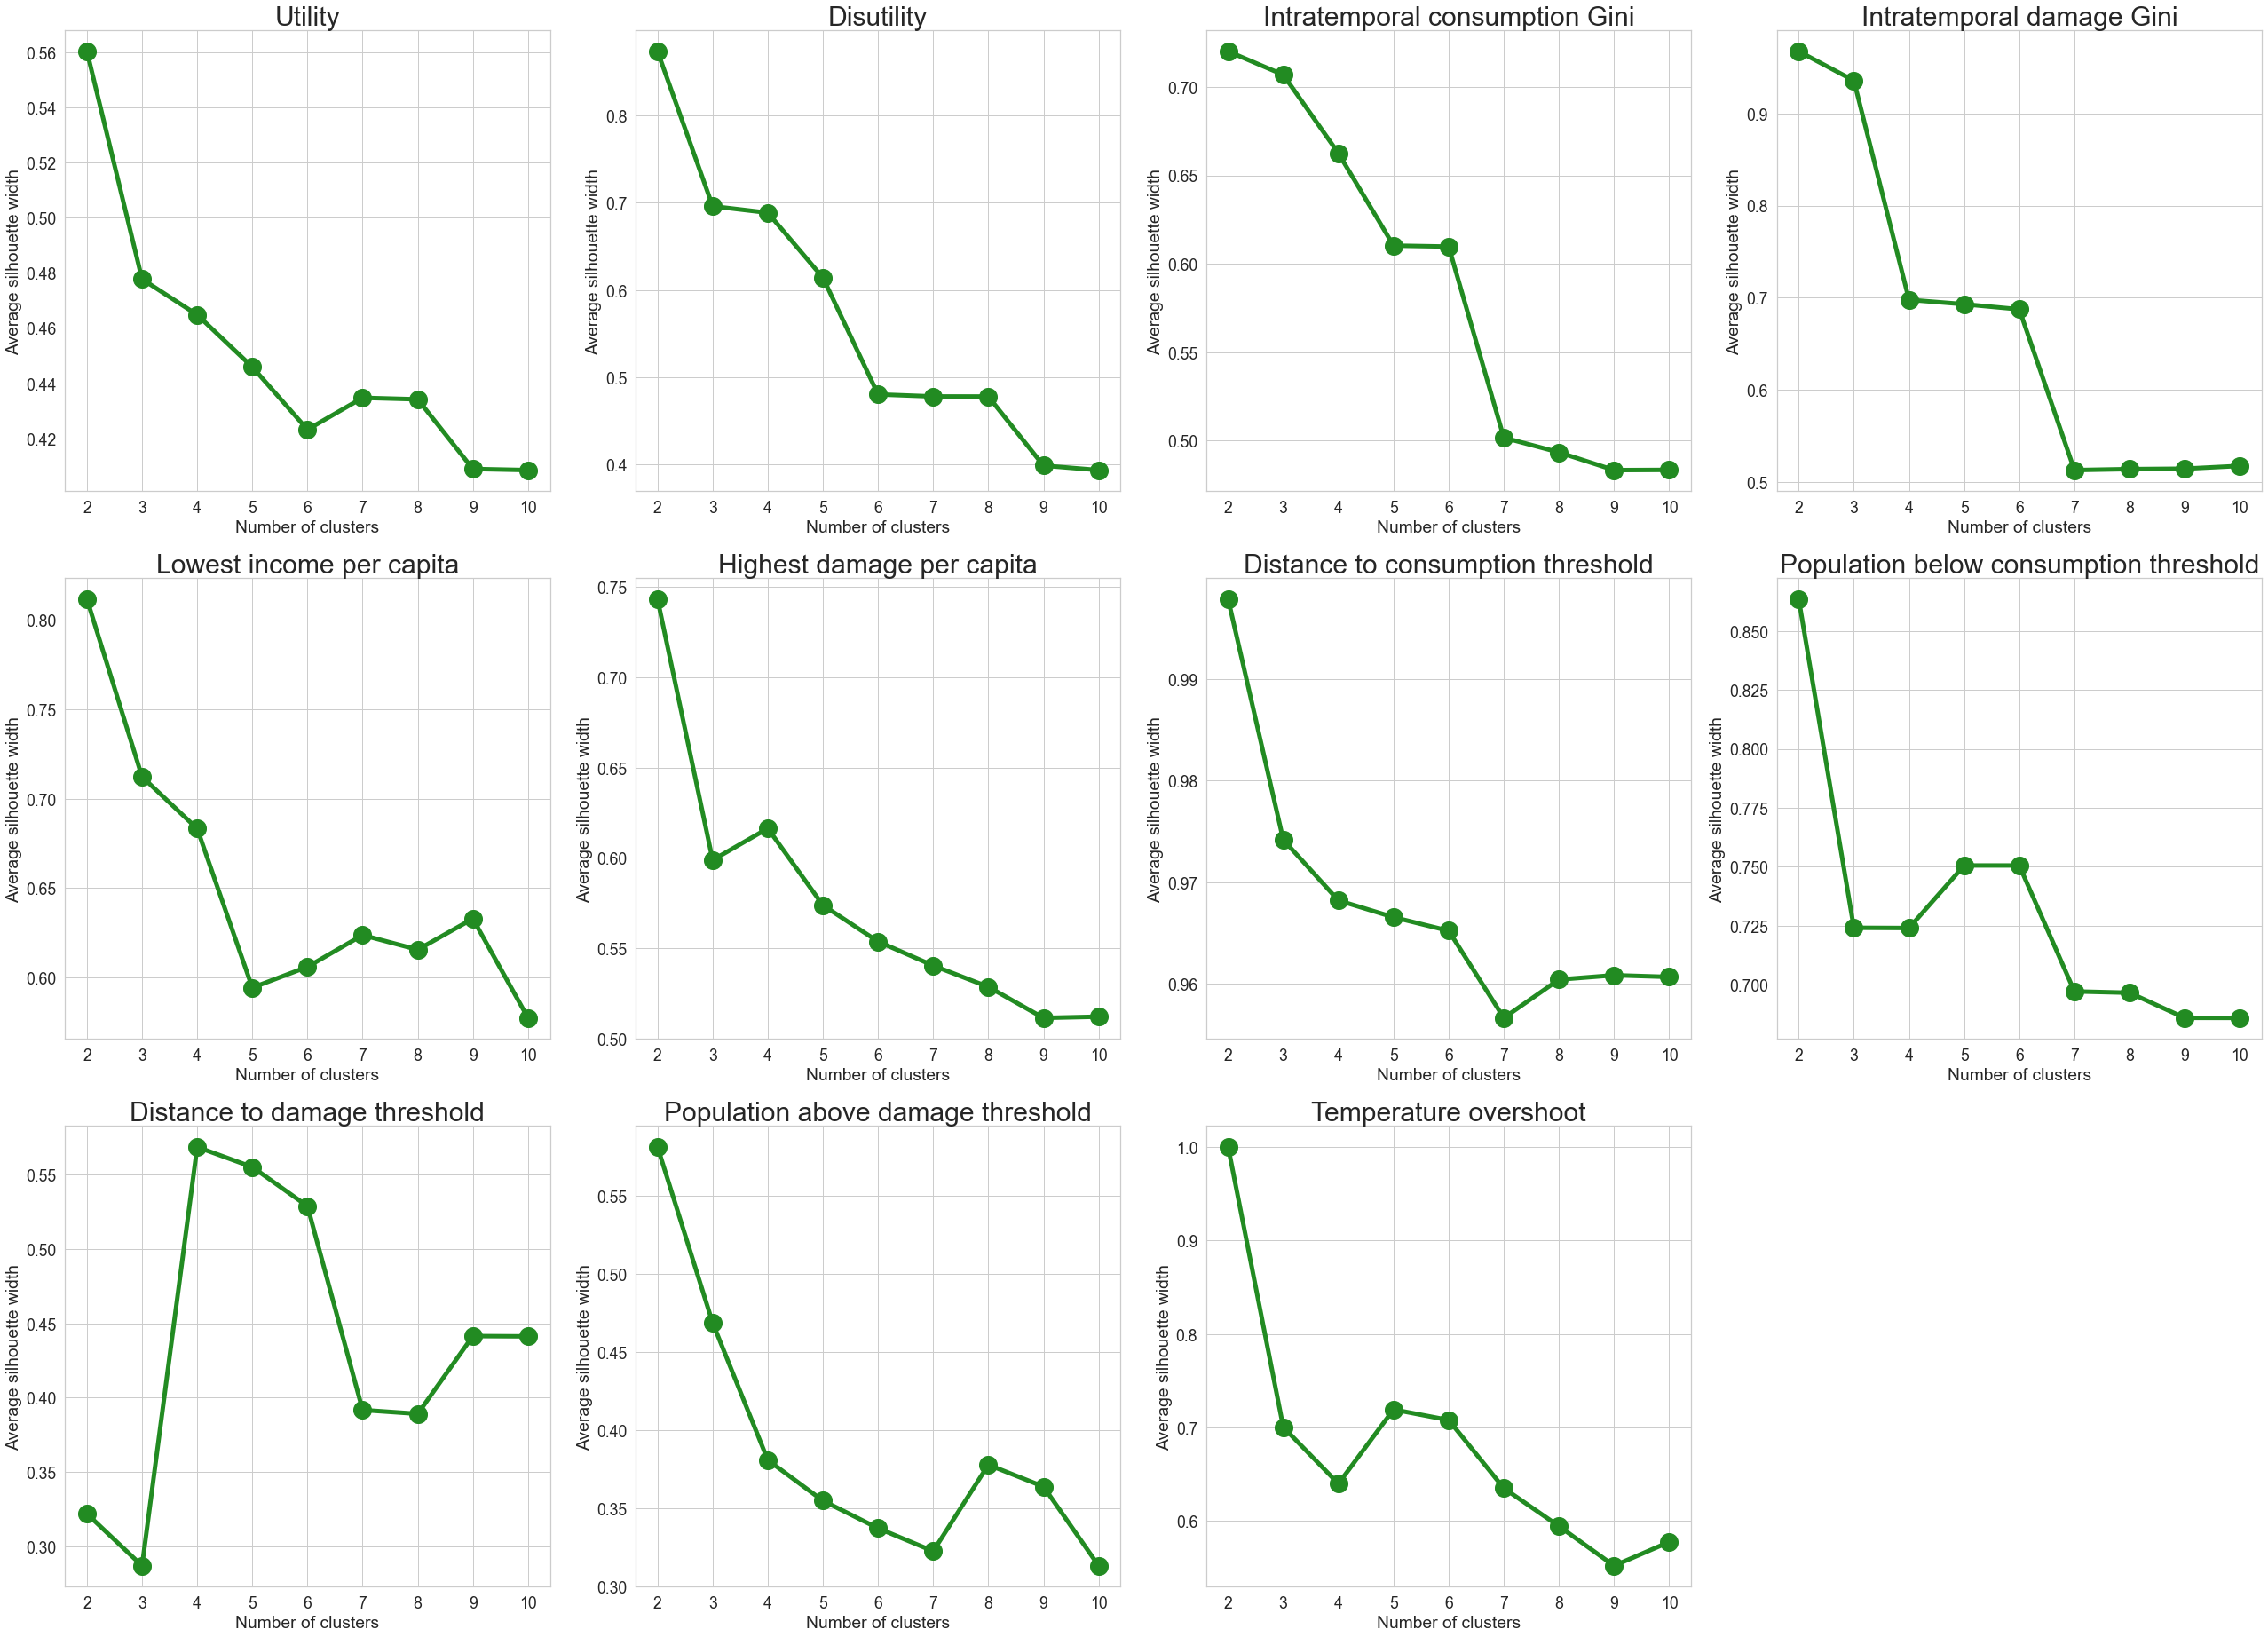

In [2]:
target_directory = os.getcwd() + '/data/'
n = 30000
file_name = f'silhouette_widths_{n}.csv'
widths = pd.read_csv(target_directory + file_name, index_col='Unnamed: 0')

plot_silhouette_widths(widths, saving=False)

#### Visual Inspection and Resulting cluster-number per objective

Given the figures above, we get the following cluster numbers per objective:


- 'Utility': 2-3,
- 'Disutility': 2-4,
- 'Intratemporal consumption Gini': 2-4,
- 'Intratemporal damage Gini': 2-3,
- 'Lowest income per capita': 2-4,
- 'Highest damage per capita': 2-4,
- 'Distance to consumption threshold': 2-3,
- 'Population below consumption threshold': 2, 5, 6,
- 'Distance to damage threshold': 4,5,6,
- 'Population above damage threshold': 2-3,
- 'Temperature overshoot': 2, 3, 5, 6,


---

## 3. Loading outcomes from 30k run

In [3]:
target_directory = os.path.dirname(os.path.dirname(os.getcwd())) + '/exploration/data/'
_, outcomes = load_results(file_name=target_directory + 'results_open_exploration_30000')
outcomes = pd.DataFrame(outcomes)

## 4. Plotting clustered pathways

In order to avoid double code, here is a function that we call again and again.

In [ ]:
def plot_clustered_pathways(outcomes, outcome_name, relevant_clusters):
    """
    Plot the pathways of a specific objective grouped by their clusters.
    @param outcomes: DataFrame
    @param outcome_name: String
    @param relevant_clusters: list with integers
    """
    experiments_list = [get_experiments_with_clusters(objective=outcome_name, cluster_number=c) for c in relevant_clusters]
    reshaphed_outcomes = get_outcomes_reshaped(outcomes_df=outcomes, objective_names=[outcome_name])

    for idx, cluster in enumerate(relevant_clusters):
        fig,axes = plotting.lines(experiments=experiments_list[idx], outcomes=reshaphed_outcomes, outcomes_to_show=outcome_name, group_by='clusters', density=Density.BOXPLOT)
        fig.set_size_inches(15, 8)
        fig.suptitle(f'{outcome_name} with {cluster} clusters', y=1.1)
        plt.show()

### 4.1 Utility

In [ ]:
plot_clustered_pathways(outcomes, 'Utility', [2, 3])

Conclusions:

### 4.2 Disutility

In [ ]:
plot_clustered_pathways(outcomes, 'Disutility', [2, 3, 4])

Conclusions:

### 4.3 Intratemporal consumption Gini

In [ ]:
plot_clustered_pathways(outcomes, 'Intratemporal consumption Gini', [2, 3, 4])

Conclusions:

### 4.4 Intratemporal damage Gini

In [ ]:
plot_clustered_pathways(outcomes, 'Intratemporal damage Gini', [2, 3])

Conclusions:

### 4.5 Lowest income per capita

In [ ]:
plot_clustered_pathways(outcomes, 'Lowest income per capita', [2, 3, 4])

Conclusions:

### 4.6 Highest damage per capita

In [ ]:
plot_clustered_pathways(outcomes, 'Highest damage per capita', [2, 3, 4])

Conclusions:

### 4.7 Distance to consumption threshold

In [ ]:
plot_clustered_pathways(outcomes, 'Distance to consumption threshold', [2, 3])

Conclusions:

### 4.8 Population below consumption threshold

In [ ]:
plot_clustered_pathways(outcomes, 'Population below consumption threshold', [2, 5, 6])

Conclusions:

### 4.9 Distance to damage threshold

In [ ]:
plot_clustered_pathways(outcomes, 'Distance to damage threshold', [4, 5, 6])

Conclusions:

### 4.10 Population above damage threshold

In [ ]:
plot_clustered_pathways(outcomes, 'Population above damage threshold', [2, 3])

Conclusions:

### 4.11 Temperature overshoot

In [ ]:
plot_clustered_pathways(outcomes, 'Temperature overshoot', [2, 3, 5, 6])

Conclusions: